In [543]:
import warnings
warnings.filterwarnings('ignore') 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier

In [515]:
path = "/Volumes/Macbook Drive/Dataset/healthcare_prediction_dataset.csv"
df = pd.read_csv(path)
df.info()
print('--------------------------------------------------------------------------------------------------------------')
print('--------------------------------------------------------------------------------------------------------------')
df.head(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal


In [19]:
df.size

832500

In [21]:
df.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [236]:
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

In [23]:
t_t =df.isnull().sum()
t_row = df.shape[0]
per = (t_t/t_row)*100
print(f'Total NULL Values\n', per)

Total NULL Values
 Name                  0.0
Age                   0.0
Gender                0.0
Blood Type            0.0
Medical Condition     0.0
Date of Admission     0.0
Doctor                0.0
Hospital              0.0
Insurance Provider    0.0
Billing Amount        0.0
Room Number           0.0
Admission Type        0.0
Discharge Date        0.0
Medication            0.0
Test Results          0.0
dtype: float64


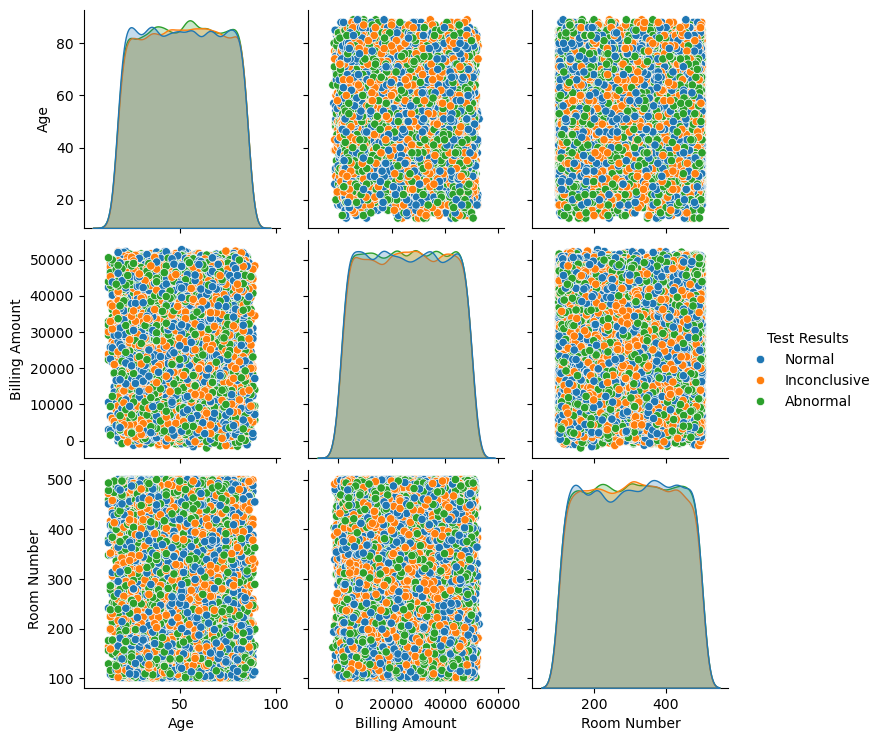

In [39]:
# # Getting Basic Analysis of dataset
# sns.pairplot(data = df, hue = 'Test Results')
# plt.show()

In [25]:
age_blood = df.groupby('Blood Type')['Age'].count()
print(f'Blood Groups Based On Age', age_blood)

Blood Groups Based On Age Blood Type
A+     6956
A-     6969
AB+    6947
AB-    6945
B+     6945
B-     6944
O+     6917
O-     6877
Name: Age, dtype: int64


In [294]:
c = ['#CAD2C5','#84A98C','#52796F','#354F52','#2F3E46']

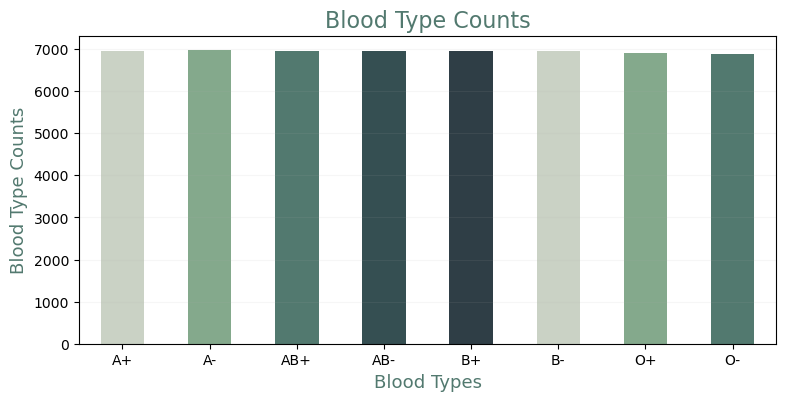

In [296]:
plt.figure(figsize=(9,4))
age_blood.plot(kind = 'bar', color = c)
plt.title('Blood Type Counts', fontsize = 16, color = '#52796F')
plt.xlabel('Blood Types', fontsize = 13, color = '#52796F')
plt.ylabel('Blood Type Counts', fontsize = 13, color = '#52796F')
plt.xticks(rotation = 0)
plt.grid(axis = 'y', alpha = 0.1)
plt.show()

<b>):-- Analysing Test Results based on the victim Age --:( <br>
<b>):-- Analyse the data using graphs for better understanding --:(

In [68]:
age_test = df.groupby('Age')['Test Results'].count()
print(f'Ouput of Test Results Based On the Victims Age', age_test)

Ouput of Test Results Based On the Victims Age Age
13     14
14     18
15     28
16     24
17     32
     ... 
85    743
86     41
87     31
88     25
89      8
Name: Test Results, Length: 77, dtype: int64


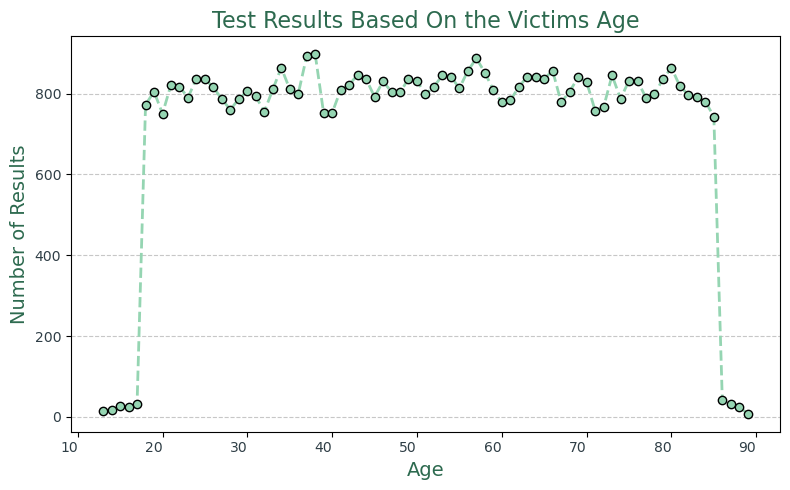

In [168]:
plt.figure(figsize=(8, 5)) 
plt.plot(age_test, color='#95D5B2', marker='o', linestyle='--', linewidth=2, markeredgecolor='black')
plt.title('Test Results Based On the Victims Age', fontsize=16, color='#2D6A4F')
plt.xlabel('Age', fontsize=14,color='#2D6A4F')
plt.ylabel('Number of Results', fontsize=14,color='#2D6A4F')
plt.xticks(rotation=0, ha='right',color='#2F3E46') 
plt.yticks(color='#2F3E46')
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout()  
plt.show()

<b>):-- Analysing Blood Type distribution based on Gender--:( <br>
<b>):-- Analyse the data using graphs for better understanding --:(

In [105]:
Gender_blood = df.groupby('Blood Type')['Gender'].value_counts()
print(f'Analysis of blood type based on Gender',Gender_blood)

Analysis of blood type based on Gender Blood Type  Gender
A+          Female    3564
            Male      3392
A-          Male      3520
            Female    3449
AB+         Male      3509
            Female    3438
AB-         Male      3484
            Female    3461
B+          Male      3568
            Female    3377
B-          Male      3483
            Female    3461
O+          Female    3464
            Male      3453
O-          Female    3512
            Male      3365
Name: count, dtype: int64


In [ ]:
c = ['#CAD2C5','#84A98C','#52796F','#354F52','#2F3E46']

<Figure size 1000x600 with 0 Axes>

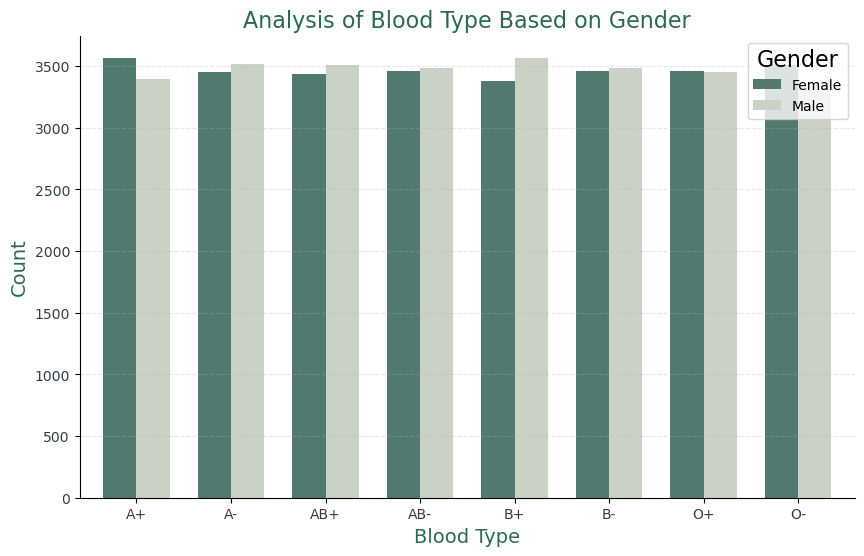

In [170]:
plt.figure(figsize=(10, 6))
Gender_blood.unstack().plot(kind='bar', figsize=(10, 6), width=0.7, color=['#52796F', '#CAD2C5'])
plt.title('Analysis of Blood Type Based on Gender', fontsize=16, color='#2D6A4F')
plt.xlabel('Blood Type', fontsize=14, color='#2D6A4F')
plt.ylabel('Count', fontsize=14, color='#2D6A4F')

plt.xticks(rotation=0, fontsize=10, color = '#2F3E46')
plt.yticks(fontsize=10,color = '#2F3E46')
plt.legend(title='Gender', fontsize=10, title_fontsize=16, loc='upper right')

sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

<b>):-- let's see which Hospitals have victims Disorders (Medical Conditons)--:( <br>

In [176]:
df['Medical Condition'].unique()

array(['Cancer', 'Obesity', 'Diabetes', 'Asthma', 'Hypertension',
       'Arthritis'], dtype=object)

In [188]:
df['Hospital'].unique()

array(['Sons and Miller', 'Kim Inc', 'Cook PLC', ...,
       'Guzman Jones and Graves,', 'and Williams, Brown Mckenzie',
       'Moreno Murphy, Griffith and'], dtype=object)

<b>):-- let's see which Hospitals have victims Disorders (Medical Conditons)--:( <br>
<b>):-- Analyse the data using graphs for better understanding --:(

In [246]:
df.Medication.unique()

array(['Paracetamol', 'Ibuprofen', 'Aspirin', 'Penicillin', 'Lipitor'],
      dtype=object)

In [250]:
admi_med = df.groupby('Admission Type')['Medication'].value_counts()
admi_med

Admission Type  Medication 
Elective        Aspirin        3784
                Paracetamol    3737
                Ibuprofen      3734
                Penicillin     3733
                Lipitor        3667
Emergency       Paracetamol    3674
                Lipitor        3666
                Ibuprofen      3654
                Penicillin     3651
                Aspirin        3624
Urgent          Lipitor        3807
                Ibuprofen      3739
                Aspirin        3686
                Penicillin     3684
                Paracetamol    3660
Name: count, dtype: int64

<Figure size 1000x600 with 0 Axes>

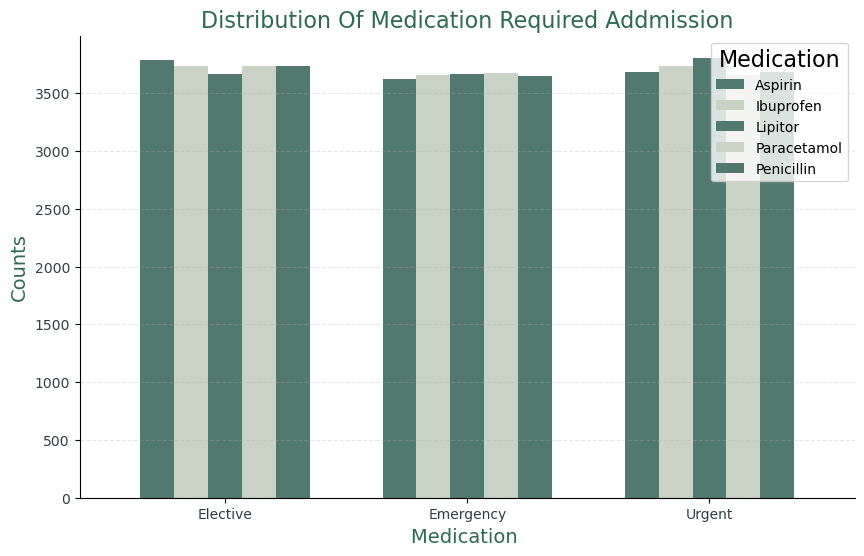

In [258]:
plt.figure(figsize=(10, 6))
admi_med.unstack().plot(kind='bar', figsize=(10, 6), width=0.7, color=['#52796F', '#CAD2C5'])
plt.title('Distribution Of Medication Required Addmission', fontsize=16, color='#2D6A4F')
plt.xlabel('Medication ', fontsize=14, color='#2D6A4F')
plt.ylabel('Counts', fontsize=14, color='#2D6A4F')

plt.xticks(rotation=0, fontsize=10, color = '#2F3E46')
plt.yticks(fontsize=10,color = '#2F3E46')
plt.legend(title='Medication', fontsize=10, title_fontsize=16, loc='upper right')

sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

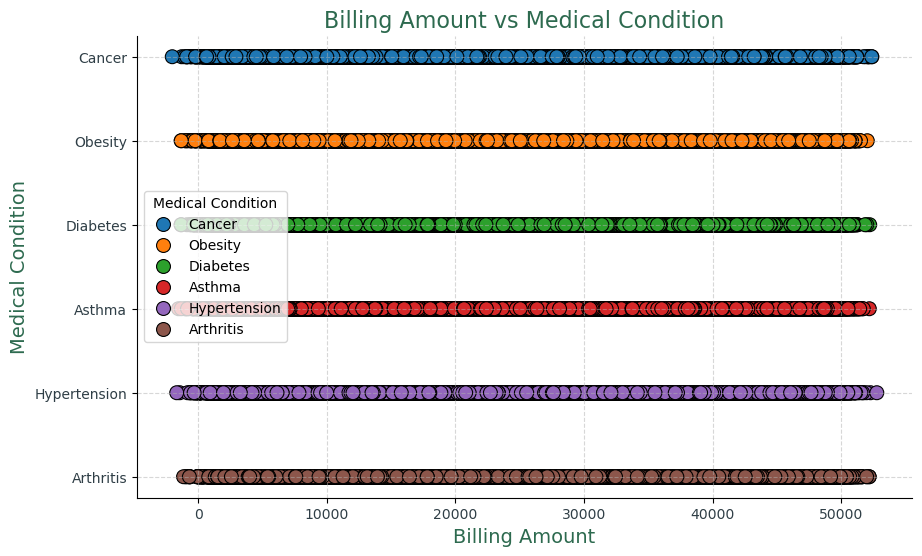

In [302]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Billing Amount', y='Medical Condition', hue='Medical Condition', 
                color = c, s=100, edgecolor='black')
plt.title('Billing Amount vs Medical Condition', fontsize=16, color='#2D6A4F')
plt.xlabel('Billing Amount', fontsize=14, color='#2D6A4F')
plt.ylabel('Medical Condition', fontsize=14, color='#2D6A4F')
plt.xticks(fontsize=10,color = '#2F3E46')
plt.yticks(fontsize=10,color = '#2F3E46')
plt.grid(True, linestyle='--', alpha=0.5)
sns.despine()
plt.show()